In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', None)
from sklearn import linear_model, model_selection
from sklearn import tree, ensemble, model_selection, metrics
from sklearn import linear_model

In [2]:
# importing the one-hot file 
variables = pd.read_csv('/Users/weijilim/Downloads/hh_final_one_hot_encoding.csv')
variables

,Unnamed: 0,HOUSEID,VEHOWN,HHFAMINC,WALK,TAXI,BUS,TRAIN,PRICE,WALK2SAVE,BIKE2SAVE,PTRANS,HHRELATD,CNTTDHH,LIF_CYC,URBAN,URBANSIZE,HIGH_EDUC,HOMEOWN,WEBUSE17,WRKCOUNT_ratio,HHSIZE_cleaned,FT_ratio,AVG_WORK_DIST,one_job,flexible_work,DRVRCNTPROP_binned,HHFAMINC_1.0,HHFAMINC_2.0,HHFAMINC_3.0,HHFAMINC_4.0,HHFAMINC_5.0,HHFAMINC_6.0,HHFAMINC_7.0,HHFAMINC_8.0,HHFAMINC_9.0,HHFAMINC_10.0,HHFAMINC_11.0,HHFAMINC_NA,WALK_1.0,WALK_2.0,WALK_3.0,WALK_4.0,WALK_5.0,WALK_NA,TAXI_1,TAXI_2,TAXI_3,TAXI_4,TAXI_5,TAXI_NA,BUS_1,BUS_2,BUS_3,BUS_4,BUS_5,BUS_NA,TRAIN_1,TRAIN_2,TRAIN_3,TRAIN_4,TRAIN_5,TRAIN_NA,PRICE_1.0,PRICE_2.0,PRICE_3.0,PRICE_4.0,PRICE_5.0,PRICE_NA,WALK2SAVE_1.0,WALK2SAVE_2.0,WALK2SAVE_3.0,WALK2SAVE_4.0,WALK2SAVE_5.0,WALK2SAVE_NA,BIKE2SAVE_1.0,BIKE2SAVE_2.0,BIKE2SAVE_3.0,BIKE2SAVE_4.0,BIKE2SAVE_5.0,BIKE2SAVE_NA,PTRANS_1.0,PTRANS_2.0,PTRANS_3.0,PTRANS_4.0,PTRANS_5.0,PTRANS_NA,HIGH_EDUC_1.0,HIGH_EDUC_2.0,HIGH_EDUC_3.0,HIGH_EDUC_4.0,HIGH_EDUC_5.0,HIGH_EDUC_NA,HOMEOWN_HOME_OWN,HOMEOWN_HOME_RENT,HOMEOWN_NA,WEBUSE17_Daily,WEBUSE17_NA,WEBUSE17_Never,WEBUSE17_Rarely,WRKCOUNT_ratio_0,WRKCOUNT_ratio_1,WRKCOUNT_ratio_<0.5,WRKCOUNT_ratio_>0.5,HHSIZE_cleaned_1,HHSIZE_cleaned_2,HHSIZE_cleaned_>2,FT_ratio_0,FT_ratio_0.5,FT_ratio_1,FT_ratio_<0.5,FT_ratio_>0.5,FT_ratio_NA,FT_ratio_non-work,AVG_WORK_DIST_10 - 15 miles,AVG_WORK_DIST_5-10 miles,AVG_WORK_DIST_<=5 miles,AVG_WORK_DIST_>15 miles,AVG_WORK_DIST_Not Sure,one_job_0,one_job_0.5,one_job_1,one_job_<0.5,one_job_>0.5,one_job_non-work,flexible_work_0,flexible_work_0.5,flexible_work_1,flexible_work_<0.5,flexible_work_NA,flexible_work_non-work,DRVRCNTPROP_binned_0,DRVRCNTPROP_binned_0.5,DRVRCNTPROP_binned_1,DRVRCNTPROP_binned_<0.5,DRVRCNTPROP_binned_>0.5,URBANSIZE_1,URBANSIZE_2,URBANSIZE_3,URBANSIZE_5,URBANSIZE_6,URBAN_1,URBAN_2,URBAN_3,URBAN_4,LIF_CYC_1,LIF_CYC_2,LIF_CYC_3,LIF_CYC_4,LIF_CYC_5,LIF_CYC_6,LIF_CYC_7,LIF_CYC_8,LIF_CYC_9,LIF_CYC_10,HHRELATD_1,HHRELATD_2
0,0,30000012,1,10.0,2.0,5.0,4.0,4.0,2.0,2.0,3.0,5.0,2,9,1,1,3,5.0,HOME_OWN,Daily,1,1,1,5-10 miles,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,30000082,1,8.0,NaN,5.0,5.0,5.0,3.0,5.0,5.0,5.0,1,12,4,1,3,5.0,HOME_RENT,Daily,>0.5,>2,0.5,>15 miles,0.5,<0.5,0.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,2,30000130,1,5.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1,4,2,1,5,5.0,HOME_OWN,Daily,1,2,1,>15 miles,1,0.5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,3,30000380,1,3.0,NaN,4.0,4.0,NaN,1.0,NaN,NaN,NaN,1,18,6,1,1,3.0,HOME_RENT,Daily,<0.5,>2,<0.5,<=5 miles,<0.5,<0.5,>0.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,4,30000434,1,8.0,1.0,5.0,5.0,4.0,NaN,2.0,3.0,3.0,1,6,2,4,6,5.0,HOME_OWN,Daily,1,2,0.5,>15 miles,1,0.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

   counts  percentage
1   15636   91.023402
0    1542    8.976598


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


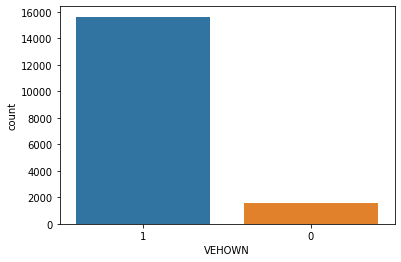

In [3]:
# check proportion
#define function 
import seaborn as sns
def cat_col_prop(data, col):
    print(pd.concat([data[col].value_counts(),
          data[col].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage')))

    sns.countplot(data[col], order =  data[col].value_counts().index)

#define function 
cat_col_prop(variables, 'VEHOWN')

In [4]:
prep = variables.drop(columns = ['Unnamed: 0','HHFAMINC','WALK','TAXI','BIKE2SAVE','PTRANS','BUS','TRAIN','WALK2SAVE','HHRELATD','LIF_CYC','URBAN','URBANSIZE','HIGH_EDUC','HOMEOWN','WRKCOUNT_ratio','HHSIZE_cleaned','FT_ratio','WEBUSE17','PRICE','AVG_WORK_DIST','one_job','flexible_work'])
households = pd.read_csv('/Users/weijilim/Downloads/csv/hhpub.csv')
NY_households = households[households['HHSTATE'] == 'NY']
prep

,HOUSEID,VEHOWN,CNTTDHH,DRVRCNTPROP_binned,HHFAMINC_1.0,HHFAMINC_2.0,HHFAMINC_3.0,HHFAMINC_4.0,HHFAMINC_5.0,HHFAMINC_6.0,HHFAMINC_7.0,HHFAMINC_8.0,HHFAMINC_9.0,HHFAMINC_10.0,HHFAMINC_11.0,HHFAMINC_NA,WALK_1.0,WALK_2.0,WALK_3.0,WALK_4.0,WALK_5.0,WALK_NA,TAXI_1,TAXI_2,TAXI_3,TAXI_4,TAXI_5,TAXI_NA,BUS_1,BUS_2,BUS_3,BUS_4,BUS_5,BUS_NA,TRAIN_1,TRAIN_2,TRAIN_3,TRAIN_4,TRAIN_5,TRAIN_NA,PRICE_1.0,PRICE_2.0,PRICE_3.0,PRICE_4.0,PRICE_5.0,PRICE_NA,WALK2SAVE_1.0,WALK2SAVE_2.0,WALK2SAVE_3.0,WALK2SAVE_4.0,WALK2SAVE_5.0,WALK2SAVE_NA,BIKE2SAVE_1.0,BIKE2SAVE_2.0,BIKE2SAVE_3.0,BIKE2SAVE_4.0,BIKE2SAVE_5.0,BIKE2SAVE_NA,PTRANS_1.0,PTRANS_2.0,PTRANS_3.0,PTRANS_4.0,PTRANS_5.0,PTRANS_NA,HIGH_EDUC_1.0,HIGH_EDUC_2.0,HIGH_EDUC_3.0,HIGH_EDUC_4.0,HIGH_EDUC_5.0,HIGH_EDUC_NA,HOMEOWN_HOME_OWN,HOMEOWN_HOME_RENT,HOMEOWN_NA,WEBUSE17_Daily,WEBUSE17_NA,WEBUSE17_Never,WEBUSE17_Rarely,WRKCOUNT_ratio_0,WRKCOUNT_ratio_1,WRKCOUNT_ratio_<0.5,WRKCOUNT_ratio_>0.5,HHSIZE_cleaned_1,HHSIZE_cleaned_2,HHSIZE_cleaned_>2,FT_ratio_0,FT_ratio_0.5,FT_ratio_1,FT_ratio_<0.5,FT_ratio_>0.5,FT_ratio_NA,FT_ratio_non-work,AVG_WORK_DIST_10 - 15 miles,AVG_WORK_DIST_5-10 miles,AVG_WORK_DIST_<=5 miles,AVG_WORK_DIST_>15 miles,AVG_WORK_DIST_Not Sure,one_job_0,one_job_0.5,one_job_1,one_job_<0.5,one_job_>0.5,one_job_non-work,flexible_work_0,flexible_work_0.5,flexible_work_1,flexible_work_<0.5,flexible_work_NA,flexible_work_non-work,DRVRCNTPROP_binned_0,DRVRCNTPROP_binned_0.5,DRVRCNTPROP_binned_1,DRVRCNTPROP_binned_<0.5,DRVRCNTPROP_binned_>0.5,URBANSIZE_1,URBANSIZE_2,URBANSIZE_3,URBANSIZE_5,URBANSIZE_6,URBAN_1,URBAN_2,URBAN_3,URBAN_4,LIF_CYC_1,LIF_CYC_2,LIF_CYC_3,LIF_CYC_4,LIF_CYC_5,LIF_CYC_6,LIF_CYC_7,LIF_CYC_8,LIF_CYC_9,LIF_CYC_10,HHRELATD_1,HHRELATD_2
0,30000012,1,9,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,30000082,1,12,0.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,30000130,1,4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,30000380,1,18,>0.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,30000434,1,6,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17173,40793685,1,5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
17174,40793808,1,16,>0.5,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,

In [5]:
hhsize = NY_households[['HOUSEID','HHSIZE']].copy()

In [6]:
hhtrip = prep[['HOUSEID','CNTTDHH']].copy()
hh_trip = hhtrip.merge(hhsize, on = 'HOUSEID', how = 'left')

In [7]:
hh_trip['avg_trip'] = hh_trip['CNTTDHH']/hh_trip['HHSIZE']

In [8]:
## pd.qcut(hh_trip['avg_trip'],3)

           counts  percentage
2.000000     2221   12.929328
3.000000     1853   10.787053
0.000000     1744   10.152521
4.000000     1738   10.117592
5.000000     1312    7.637676
...           ...         ...
23.000000       1    0.005821
14.500000       1    0.005821
3.285714        1    0.005821
5.375000        1    0.005821
1.625000        1    0.005821

[156 rows x 2 columns]


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


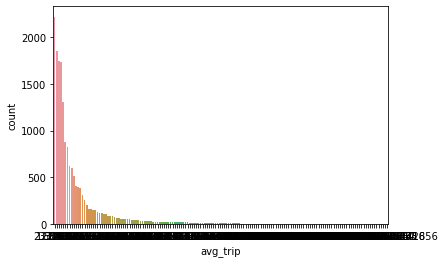

In [9]:
cat_col_prop(hh_trip, 'avg_trip')

             counts  percentage
2 - 5 trips    7691   44.772383
<=2 trips      5961   34.701362
> 5 trips      3526   20.526255


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


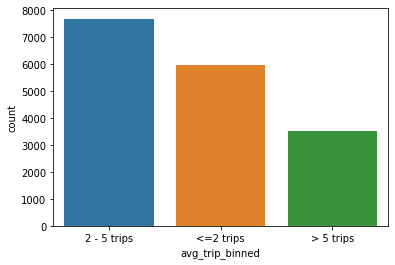

In [10]:
bins = [0, 2, 5, 100]
bins_label = ['<=2 trips','2 - 5 trips','> 5 trips']
hh_trip['avg_trip_binned'] = pd.cut(hh_trip['avg_trip'], bins, labels = bins_label,include_lowest=True)


cat_col_prop(hh_trip,'avg_trip_binned')

In [11]:
hh_trip_final = hh_trip[['HOUSEID','avg_trip_binned','avg_trip']]

In [12]:
prep = prep.merge(hh_trip_final, on ='HOUSEID', how = 'left')

In [13]:
df_one_hot = pd.get_dummies(prep['avg_trip_binned'])

In [14]:
prep_final = pd.concat([prep, df_one_hot], axis = 1)
prep_final = prep_final.drop(columns =['avg_trip_binned','CNTTDHH','DRVRCNTPROP_binned','avg_trip'])
prep_final

,HOUSEID,VEHOWN,HHFAMINC_1.0,HHFAMINC_2.0,HHFAMINC_3.0,HHFAMINC_4.0,HHFAMINC_5.0,HHFAMINC_6.0,HHFAMINC_7.0,HHFAMINC_8.0,HHFAMINC_9.0,HHFAMINC_10.0,HHFAMINC_11.0,HHFAMINC_NA,WALK_1.0,WALK_2.0,WALK_3.0,WALK_4.0,WALK_5.0,WALK_NA,TAXI_1,TAXI_2,TAXI_3,TAXI_4,TAXI_5,TAXI_NA,BUS_1,BUS_2,BUS_3,BUS_4,BUS_5,BUS_NA,TRAIN_1,TRAIN_2,TRAIN_3,TRAIN_4,TRAIN_5,TRAIN_NA,PRICE_1.0,PRICE_2.0,PRICE_3.0,PRICE_4.0,PRICE_5.0,PRICE_NA,WALK2SAVE_1.0,WALK2SAVE_2.0,WALK2SAVE_3.0,WALK2SAVE_4.0,WALK2SAVE_5.0,WALK2SAVE_NA,BIKE2SAVE_1.0,BIKE2SAVE_2.0,BIKE2SAVE_3.0,BIKE2SAVE_4.0,BIKE2SAVE_5.0,BIKE2SAVE_NA,PTRANS_1.0,PTRANS_2.0,PTRANS_3.0,PTRANS_4.0,PTRANS_5.0,PTRANS_NA,HIGH_EDUC_1.0,HIGH_EDUC_2.0,HIGH_EDUC_3.0,HIGH_EDUC_4.0,HIGH_EDUC_5.0,HIGH_EDUC_NA,HOMEOWN_HOME_OWN,HOMEOWN_HOME_RENT,HOMEOWN_NA,WEBUSE17_Daily,WEBUSE17_NA,WEBUSE17_Never,WEBUSE17_Rarely,WRKCOUNT_ratio_0,WRKCOUNT_ratio_1,WRKCOUNT_ratio_<0.5,WRKCOUNT_ratio_>0.5,HHSIZE_cleaned_1,HHSIZE_cleaned_2,HHSIZE_cleaned_>2,FT_ratio_0,FT_ratio_0.5,FT_ratio_1,FT_ratio_<0.5,FT_ratio_>0.5,FT_ratio_NA,FT_ratio_non-work,AVG_WORK_DIST_10 - 15 miles,AVG_WORK_DIST_5-10 miles,AVG_WORK_DIST_<=5 miles,AVG_WORK_DIST_>15 miles,AVG_WORK_DIST_Not Sure,one_job_0,one_job_0.5,one_job_1,one_job_<0.5,one_job_>0.5,one_job_non-work,flexible_work_0,flexible_work_0.5,flexible_work_1,flexible_work_<0.5,flexible_work_NA,flexible_work_non-work,DRVRCNTPROP_binned_0,DRVRCNTPROP_binned_0.5,DRVRCNTPROP_binned_1,DRVRCNTPROP_binned_<0.5,DRVRCNTPROP_binned_>0.5,URBANSIZE_1,URBANSIZE_2,URBANSIZE_3,URBANSIZE_5,URBANSIZE_6,URBAN_1,URBAN_2,URBAN_3,URBAN_4,LIF_CYC_1,LIF_CYC_2,LIF_CYC_3,LIF_CYC_4,LIF_CYC_5,LIF_CYC_6,LIF_CYC_7,LIF_CYC_8,LIF_CYC_9,LIF_CYC_10,HHRELATD_1,HHRELATD_2,<=2 trips,2 - 5 trips,> 5 trips
0,30000012,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,30000082,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,30000130,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,30000380,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4,30000434,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17173,40793685,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
17174,40793808,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

## Model Implementation

In [15]:

# shuffle the data 
prep_final = prep_final.reindex(np.random.permutation(prep_final.index)) 

# training variables
x = prep_final.drop(columns = ['HOUSEID','VEHOWN'])


#
# test variables 
y = np.array(prep_final[['VEHOWN']]).astype(int)

y = y.reshape(y.shape[0],)
y.shape
x.shape

(17178, 133)

In [16]:
# split into train and test set
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=2021)

In [17]:
y_test.shape

(3436,)

In [18]:
# initial model without doing sampling
estimator = linear_model.LogisticRegression(max_iter = 300)
estimator.fit(x_train, y_train)

LogisticRegression(max_iter=300)

In [19]:
# use the metrics to see - accuracy, recall, precision and F1 score
y_pred = estimator.predict(x_test)
print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_pred),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_pred),5))
print('Recall:',round(metrics.f1_score(y_test, y_pred),5))
print('Precision:',round(metrics.precision_score(y_test, y_pred),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_pred),5))
print('JQ precision - to check', round(metrics.precision_score(1-y_test, 1-y_pred),5))
print('JQ recall - to check', round(metrics.recall_score(1-y_test, 1-y_pred),5))

Accuracy Score:  0.97381
F1 Score: 0.98911
Recall: 0.98563
Precision: 0.98218
AUC 0.90566
JQ precision - to check 0.88396
JQ recall - to check 0.82222


In [20]:
print(metrics.confusion_matrix(y_test, y_pred))

sm_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_pred)}
Accuracy: {round(metrics.accuracy_score(y_test, y_pred), 3)}
"""
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_pred)))

print('All the scores are very high because it is correctly predicting 1, which is quite a big proportion')

[[ 259   56]
 [  34 3087]]

The evaluation report is:
Confusion Matrix:
[[ 259   56]
 [  34 3087]]
Accuracy: 0.974

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       315
           1       0.98      0.99      0.99      3121

    accuracy                           0.97      3436
   macro avg       0.93      0.91      0.92      3436
weighted avg       0.97      0.97      0.97      3436

All the scores are very high because it is correctly predicting 1, which is quite a big proportion


In [21]:
# Decision Tree
dt_estimator = tree.DecisionTreeClassifier()
dt_estimator.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
# Confusion Matrix for DT
y_predict = dt_estimator.predict(x_train)
report = f"""Training set
The evaluation report of fully grown tree is:
Confusion Matrix:
{metrics.confusion_matrix(y_train, y_predict)}
Accuracy: {round(metrics.accuracy_score(y_train, y_predict), 3)}
"""
print(report)

y_predict = dt_estimator.predict(x_test)
report = f"""Test set
The evaluation report of fully grown tree is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_predict)}
Accuracy: {round(metrics.accuracy_score(y_test, y_predict), 3)}
"""
print(report)

Training set
The evaluation report of fully grown tree is:
Confusion Matrix:
[[ 1227     0]
 [    0 12515]]
Accuracy: 1.0

Test set
The evaluation report of fully grown tree is:
Confusion Matrix:
[[ 243   72]
 [  75 3046]]
Accuracy: 0.957



In [23]:
# Metrics for DT 
print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_predict),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_predict),5))
print('Recall:',round(metrics.f1_score(y_test, y_predict),5))
print('Precision:',round(metrics.precision_score(y_test, y_predict),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_predict),5))
print('JQ precision - to check', round(metrics.precision_score(1-y_test, 1-y_predict),5))
print('JQ recall - to check', round(metrics.recall_score(1-y_test, 1-y_predict),5))

Accuracy Score:  0.95722
F1 Score: 0.97597
Recall: 0.97644
Precision: 0.97691
AUC 0.8737
JQ precision - to check 0.76415
JQ recall - to check 0.77143


In [24]:
# visualise the tree
from sklearn.tree import export_graphviz
import graphviz

In [25]:
x_columns = x.columns.to_list()

In [26]:
dot_data = export_graphviz(
        dt_estimator,
        out_file=None,
        feature_names=x_columns,
        class_names = ['non-car','car'],
        rounded=True,
        filled=True
    )

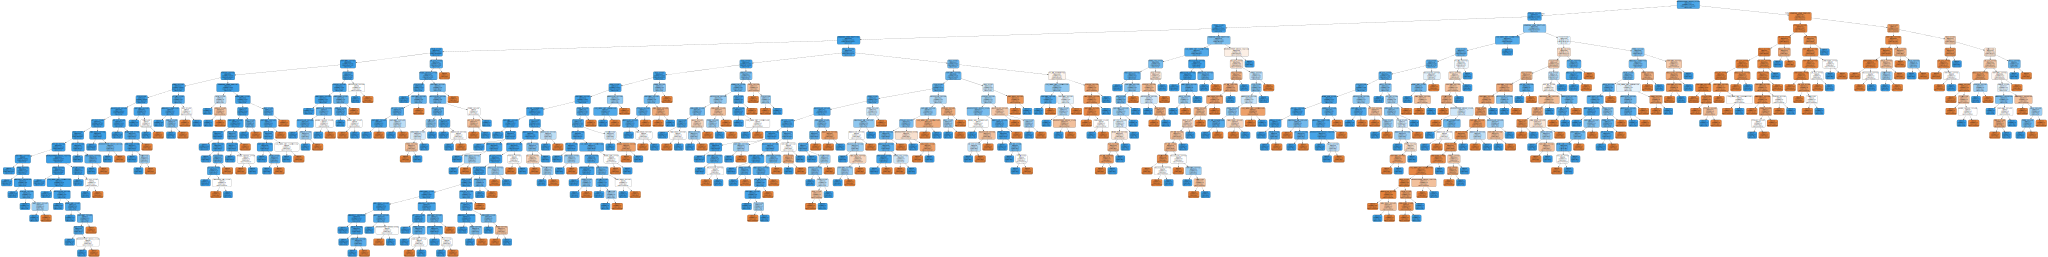

In [27]:
graph = graphviz.Source(dot_data, format="png") 
graph

In [28]:
graph.render("initial_tree")

'initial_tree.png'

## Oversampling using imblearn

In [29]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [30]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
# apply only to train set
# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

lr_smote = linear_model.LogisticRegression(max_iter = 300)
lr_smote.fit(x_train_SMOTE, y_train_SMOTE)

y_pred_smote = lr_smote.predict(x_test)
print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_pred_smote),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_pred_smote),5))
print('Recall:',round(metrics.f1_score(y_test, y_pred_smote),5))
print('Precision:',round(metrics.precision_score(y_test, y_pred_smote),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_pred_smote),5))
print('JQ precision - to check', round(metrics.precision_score(1-y_test, 1-y_pred_smote),5))
print('JQ recall - to check', round(metrics.recall_score(1-y_test, 1-y_pred_smote),5))

Before oversampling:  Counter({1: 12515, 0: 1227})
After oversampling:  Counter({1: 12515, 0: 12515})
Accuracy Score:  0.97497
F1 Score: 0.98847
Recall: 0.98625
Precision: 0.98405
AUC 0.91487
JQ precision - to check 0.8804
JQ recall - to check 0.84127


In [31]:
sm_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_pred_smote)}
Accuracy: {round(metrics.accuracy_score(y_test, y_pred_smote), 3)}
"""
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_pred_smote)))




The evaluation report is:
Confusion Matrix:
[[ 265   50]
 [  36 3085]]
Accuracy: 0.975

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       315
           1       0.98      0.99      0.99      3121

    accuracy                           0.97      3436
   macro avg       0.93      0.91      0.92      3436
weighted avg       0.97      0.97      0.97      3436



In [40]:
# combining oversampling and undersampling..? yet to get the confusion matrix out
import numpy as np
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from numpy import mean

over_values = [0.3,0.4,0.5]
under_values = [0.7,0.6,0.5]
for o in over_values:
  for u in under_values:
    # define pipeline
    model = SVC()
    over = SMOTE(sampling_strategy=o)
    under = RandomUnderSampler(sampling_strategy=u)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    scores = cross_val_score(pipeline, x, y, scoring='precision', cv=5, n_jobs=-1)
    score = mean(scores)
    print('SMOTE oversampling rate:%.1f, Random undersampling rate:%.1f , Mean recall: %.3f' % (o, u, score))


ValueError: Found input variables with inconsistent numbers of samples: [133, 17178]

## Random Forest

In [33]:
# Random Forest Model
rf_car = ensemble.RandomForestClassifier(max_depth = 20, random_state = 2021, min_samples_split = 10, min_samples_leaf = 3, n_estimators = 100,class_weight='balanced')
rf_car.fit(x_train, y_train)
y_rf_pred = rf_car.predict(x_test)
print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_rf_pred),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_rf_pred),5))
print('Recall:',round(metrics.f1_score(y_test, y_rf_pred),5))
print('Precision:',round(metrics.precision_score(y_test, y_rf_pred),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_rf_pred),5))
print('JQ precision - to check', round(metrics.precision_score(1-y_test, 1-y_rf_pred),5))
print('JQ recall - to check', round(metrics.recall_score(1-y_test, 1-y_rf_pred),5))

Accuracy Score:  0.97119
F1 Score: 0.97821
Recall: 0.98405
Precision: 0.98995
AUC 0.9399
JQ precision - to check 0.80682
JQ recall - to check 0.90159


In [34]:
print(metrics.confusion_matrix(y_test, y_rf_pred))

sm_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_rf_pred)}
Accuracy: {round(metrics.accuracy_score(y_test, y_rf_pred), 3)}
"""
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_rf_pred)))

[[ 284   31]
 [  68 3053]]

The evaluation report is:
Confusion Matrix:
[[ 284   31]
 [  68 3053]]
Accuracy: 0.971

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       315
           1       0.99      0.98      0.98      3121

    accuracy                           0.97      3436
   macro avg       0.90      0.94      0.92      3436
weighted avg       0.97      0.97      0.97      3436



In [35]:
# Feature Importance for Random Forest
x = rf_car.feature_importances_
x_idx = np.where(x != 0)[0]
rf_features = pd.DataFrame(x_train.columns[x_idx], columns = ['Car Variables'])
x_values = pd.DataFrame(rf_car.feature_importances_[x_idx], columns = ['Feature Importance'])
car_importance = pd.concat([rf_features.reset_index(drop=True), x_values], axis=1)
car_importance.nlargest(10,['Feature Importance'])

,Car Variables,Feature Importance
101,DRVRCNTPROP_binned_0,0.158846
66,HOMEOWN_HOME_RENT,0.097384
65,HOMEOWN_HOME_OWN,0.091182
103,DRVRCNTPROP_binned_1,0.070641
12,WALK_1.0,0.042562
28,BUS_5,0.040733
124,HHRELATD_1,0.027417
76,HHSIZE_cleaned_1,0.024303
22,TAXI_5,0.023951
20,TAXI_3,0.021471


In [36]:
# Random Forest Model with tuning
rf_car = ensemble.RandomForestClassifier(max_depth = 15, max_features = 'auto',random_state = 2021, min_samples_split = 20, min_samples_leaf = 3, n_estimators = 60,class_weight='balanced')
rf_car.fit(x_train, y_train)
y_rf_pred = rf_car.predict(x_test)
print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_rf_pred),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_rf_pred),5))
print('Recall:',round(metrics.f1_score(y_test, y_rf_pred),5))
print('Precision:',round(metrics.precision_score(y_test, y_rf_pred),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_rf_pred),5))
print('JQ precision on non-car', round(metrics.precision_score(1-y_test, 1-y_rf_pred),5))
print('JQ recall on non-vst', round(metrics.recall_score(1-y_test, 1-y_rf_pred),5))

Accuracy Score:  0.96828
F1 Score: 0.97469
Recall: 0.9824
Precision: 0.99023
AUC 0.93972
JQ precision - to check 0.78297
JQ recall - to check 0.90476


In [37]:
print(metrics.confusion_matrix(y_test, y_rf_pred))

sm_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_rf_pred)}
Accuracy: {round(metrics.accuracy_score(y_test, y_rf_pred), 3)}
"""
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_rf_pred)))

[[ 285   30]
 [  79 3042]]

The evaluation report is:
Confusion Matrix:
[[ 285   30]
 [  79 3042]]
Accuracy: 0.968

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       315
           1       0.99      0.97      0.98      3121

    accuracy                           0.97      3436
   macro avg       0.89      0.94      0.91      3436
weighted avg       0.97      0.97      0.97      3436



In [38]:
# Tuning of RF Model

# Hyperparameter Tuning for Random Forest
# best parameters n_estimator: > 60, max_feature = 'auto', max_depth = 20, min_sample_split = 10, min_sample_leaf = 3
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators': [10,20,30,40,50,60],
              'max_features': ['auto', 'sqrt'],
              'max_depth': np.arange(5, 36, 5),
              'min_samples_split': [5, 10, 20, 40],
              'min_samples_leaf': [3, 5, 11, 25],
             }
rf_tune = RandomizedSearchCV(RandomForestClassifier(), param_distributions = parameters, n_iter = 100, verbose = 2, scoring = 'precision', n_jobs = -1)
rf_tune.fit(x_train, y_train)
print('best score:', rf_tune.best_score_)
print('best parameters: ', rf_tune.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
best score: 0.9748457509925634
best parameters:  {'n_estimators': 60, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 15}


In [39]:
# Feature Importance for Random Forest Tuned
x = rf_car.feature_importances_
x_idx = np.where(x != 0)[0]
rf_features = pd.DataFrame(x_train.columns[x_idx], columns = ['Car Variables'])
x_values = pd.DataFrame(rf_car.feature_importances_[x_idx], columns = ['Feature Importance'])
car_importance = pd.concat([rf_features.reset_index(drop=True), x_values], axis=1)
car_importance.nlargest(10,['Feature Importance'])

,Car Variables,Feature Importance
101,DRVRCNTPROP_binned_0,0.158095
66,HOMEOWN_HOME_RENT,0.102592
103,DRVRCNTPROP_binned_1,0.097192
28,BUS_5,0.058472
65,HOMEOWN_HOME_OWN,0.056448
12,WALK_1.0,0.048798
76,HHSIZE_cleaned_1,0.033000
124,HHRELATD_1,0.030111
22,TAXI_5,0.020500
54,PTRANS_1.0,0.020345


In [45]:
# Gradient Boost Model
gb_car = ensemble.GradientBoostingClassifier(n_estimators = 10, random_state = 2021)
gb_car.fit(x_train, y_train)
y_gb_car = gb_car.predict(x_test)

print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_gb_car),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_gb_car),5))
print('Recall:',round(metrics.f1_score(y_test, y_gb_car),5))
print('Precision:',round(metrics.precision_score(y_test, y_gb_car),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_gb_car),5))
print('JQ precision on non-car', round(metrics.precision_score(1-y_test, 1-y_gb_car),5))
print('JQ recall on non-vst', round(metrics.recall_score(1-y_test, 1-y_gb_car),5))

Accuracy Score:  0.96624
F1 Score: 0.99744
Recall: 0.98171
Precision: 0.96647
AUC 0.82729
JQ precision on non-car 0.96279
JQ recall on non-vst 0.65714


In [46]:
print(metrics.confusion_matrix(y_test, y_gb_car))

sm_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_gb_car)}
Accuracy: {round(metrics.accuracy_score(y_test, y_gb_car), 3)}
"""
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_gb_car)))

[[ 207  108]
 [   8 3113]]

The evaluation report is:
Confusion Matrix:
[[ 207  108]
 [   8 3113]]
Accuracy: 0.966

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.96      0.66      0.78       315
           1       0.97      1.00      0.98      3121

    accuracy                           0.97      3436
   macro avg       0.96      0.83      0.88      3436
weighted avg       0.97      0.97      0.96      3436



In [48]:
z = gb_car.feature_importances_
z_columns = pd.DataFrame(x_train.columns, columns = ['Input Variables'])
z_values = pd.DataFrame(gb_car.feature_importances_, columns = ['Feature Importance'])
feature_gb = pd.concat([z_columns.reset_index(drop=True), z_values], axis=1)
feature_gb.nlargest(10,['Feature Importance'])

,Input Variables,Feature Importance
104,DRVRCNTPROP_binned_0,0.856690
67,HOMEOWN_HOME_RENT,0.032610
54,PTRANS_1.0,0.024510
12,WALK_1.0,0.020515
20,TAXI_3,0.015336
30,TRAIN_1,0.010629
25,BUS_2,0.008843
19,TAXI_2,0.007942
90,AVG_WORK_DIST_>15 miles,0.005837
26,BUS_3,0.003561


In [69]:
# Hyperparameter Tuning for Gradient Boosting
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'n_estimators': [20,50,100],
              "learning_rate"    : [0.1, 0.3,0.5],
              "max_depth"        : [10, 20,30],
              "min_samples_split": [10,20,30],
              "min_samples_leaf" : [5,7,11],
              "max_leaf_nodes": [3,5,7,10]
             }
grad_reg = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions = param_grid, n_iter = 100, scoring = 'precision', verbose = 10, n_jobs = -1)
grad_reg.fit(x_train,y_train)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.3, 0.5],
                                        'max_depth': [10, 20, 30],
                                        'max_leaf_nodes': [3, 5, 7, 10],
                                        'min_samples_leaf': [5, 7, 11],
                                        'min_samples_split': [10, 20, 30],
                                        'n_estimators': [20, 50, 100]},
                   scoring='precision', verbose=10)

In [70]:
print('best score:', grad_reg.best_score_)
print('best parameters: ', grad_reg.best_params_)

best score: 0.9825953290854027
best parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 11, 'max_leaf_nodes': 7, 'max_depth': 10, 'learning_rate': 0.5}


In [73]:
# Gradient Boost Model
gb_car = ensemble.GradientBoostingClassifier(n_estimators = 100, min_samples_split = 10, learning_rate = 0.5, min_samples_leaf = 5, max_leaf_nodes = 7, max_depth = 10, random_state = 2021)
gb_car.fit(x_train, y_train)
y_gb_car = gb_car.predict(x_test)

print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_gb_car),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_gb_car),5))
print('Recall:',round(metrics.f1_score(y_test, y_gb_car),5))
print('Precision:',round(metrics.precision_score(y_test, y_gb_car),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_gb_car),5))
print('JQ precision on non-car', round(metrics.precision_score(1-y_test, 1-y_gb_car),5))
print('JQ recall on non-car', round(metrics.recall_score(1-y_test, 1-y_gb_car),5))

Accuracy Score:  0.97264
F1 Score: 0.98879
Recall: 0.985
Precision: 0.98124
AUC 0.90074
JQ precision on non-car 0.87973
JQ recall on non-car 0.8127


In [74]:
sm_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_gb_car)}
Accuracy: {round(metrics.accuracy_score(y_test, y_gb_car), 3)}
"""
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_gb_car)))


The evaluation report is:
Confusion Matrix:
[[ 256   59]
 [  35 3086]]
Accuracy: 0.973

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       315
           1       0.98      0.99      0.98      3121

    accuracy                           0.97      3436
   macro avg       0.93      0.90      0.91      3436
weighted avg       0.97      0.97      0.97      3436



In [81]:
# Adaboost
ada_car = ensemble.AdaBoostClassifier(random_state=2021, learning_rate = 0.3, n_estimators=300)
ada_car.fit(x_train, y_train)
y_ada = ada_car.predict(x_test)

print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_ada),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_ada),5))
print('Recall:',round(metrics.f1_score(y_test, y_ada),5))
print('Precision:',round(metrics.precision_score(y_test, y_ada),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_ada),5))
print('JQ precision on non-car', round(metrics.precision_score(1-y_test, 1-y_ada),5))
print('JQ recall on non-car', round(metrics.recall_score(1-y_test, 1-y_ada),5))

m_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_gb_car)}
Accuracy: {round(metrics.accuracy_score(y_test, y_gb_car), 3)}
"""
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_gb_car)))

Accuracy Score:  0.9741
F1 Score: 0.99007
Recall: 0.9858
Precision: 0.98158
AUC 0.90297
JQ precision on non-car 0.89236
JQ recall on non-car 0.81587

The evaluation report is:
Confusion Matrix:
[[ 256   59]
 [  35 3086]]
Accuracy: 0.973

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       315
           1       0.98      0.99      0.98      3121

    accuracy                           0.97      3436
   macro avg       0.93      0.90      0.91      3436
weighted avg       0.97      0.97      0.97      3436



In [84]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
param_grid = {'n_estimators': [50,100],
              "learning_rate" : [0.01,0.05, 0.1, 0.3],
             }
ada_reg = RandomizedSearchCV(AdaBoostClassifier(), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)
ada_reg.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(estimator=AdaBoostClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3],
                                        'n_estimators': [50, 100]},
                   verbose=2)

In [86]:
print('best score:', ada_reg.best_score_)
print('best parameters: ', ada_reg.best_params_)

best score: 0.9715470704445656
best parameters:  {'n_estimators': 100, 'learning_rate': 0.3}


In [87]:
# Adaboost
ada_car = ensemble.AdaBoostClassifier(random_state=2021, learning_rate = 0.3, n_estimators=100)
ada_car.fit(x_train, y_train)
y_ada = ada_car.predict(x_test)

print('Accuracy Score: ',round(metrics.accuracy_score(y_test, y_ada),5))
print('F1 Score:',round(metrics.recall_score(y_test, y_ada),5))
print('Recall:',round(metrics.f1_score(y_test, y_ada),5))
print('Precision:',round(metrics.precision_score(y_test, y_ada),5))
print('AUC',round(metrics.roc_auc_score(y_test, y_ada),5))
print('JQ precision on non-car', round(metrics.precision_score(1-y_test, 1-y_ada),5))
print('JQ recall on non-car', round(metrics.recall_score(1-y_test, 1-y_ada),5))

m_report = f"""
The evaluation report is:
Confusion Matrix:
{metrics.confusion_matrix(y_test, y_gb_car)}
Accuracy: {round(metrics.accuracy_score(y_test, y_gb_car), 3)}
"""
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, y_gb_car)))

Accuracy Score:  0.97439
F1 Score: 0.99199
Recall: 0.98599
Precision: 0.98006
AUC 0.89599
JQ precision on non-car 0.90975
JQ recall on non-car 0.8

The evaluation report is:
Confusion Matrix:
[[ 256   59]
 [  35 3086]]
Accuracy: 0.973

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       315
           1       0.98      0.99      0.98      3121

    accuracy                           0.97      3436
   macro avg       0.93      0.90      0.91      3436
weighted avg       0.97      0.97      0.97      3436

